In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [48]:
glue_tasks = ["CoLA", "SST-2", "Sara"]
metrics = {
    "CoLA": "MCC",
    "SST-2": "accuracy",
    "Sara": "micro-avg F1"
}
model_types = {
    "main": ["teacher", "BERT", "LSTM"],
    "additional": ["scratch", "hard-logits"]
}
model_type_bar_hatches = {
    "main": "",
    "scratch": "//",
    "hard-logits": "x"
#     ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
}
model_colours = { # http://mkweb.bcgsc.ca/colorblind/
    "teacher": (0, 0, 0), # black
    "LSTM": (86, 180, 233), # sky blue
    "BERT": (230, 159, 0), # orange
    "embedding": (0, 114, 178) # blue
}
model_colours = {name: np.array(c)/255 for name, c in model_colours.items()}

best_model_scores = {
    "CoLA": {
        "teacher": 59.9,
        "BERT": 45.0,
        "BERT-scratch": 35.2,
        "BERT-hard-logits": 37.3,
        "LSTM": 44.2, # 44.8
        "LSTM-scratch": 37.5,
        "LSTM-hard-logits": 38.4
    },
    "SST-2": {
        "teacher": 91.5,
        "BERT": 89.3, # 89.2
        "BERT-scratch": 87.4,
        "BERT-hard-logits": 86.7,
        "LSTM": 91.2, # 91.9
        "LSTM-scratch": 90.8,
        "LSTM-hard-logits": 90.6
    },
    "Sara": {
        "teacher": 87.5,
        "BERT": 87.1,
        "BERT-scratch": 86.0,
        "BERT-hard-logits": 84.1,
        "LSTM": 86.5,
        "LSTM-scratch": 85.6,
        "LSTM-hard-logits": 84.9
    },
}

# Comparing performance of best models

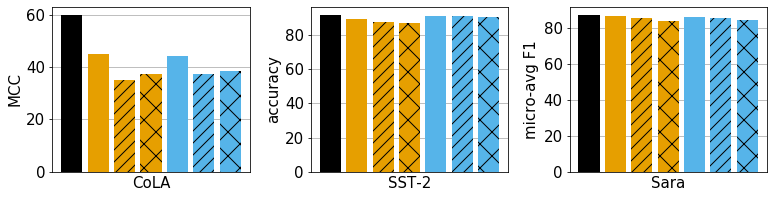

In [49]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11, 3))
for ax, task in zip(axs, glue_tasks):
    results = [best_model_scores[task]["teacher"]]
    colours = [model_colours["teacher"]]
    hatches = [model_type_bar_hatches["main"]]
    for main_model_type in ["BERT", "LSTM"]:
        all_model_types = [main_model_type] + [(main_model_type + "-" + additional) for additional in model_types["additional"]]
        colours += [model_colours[main_model_type] for _ in range(len(model_types["additional"])+1)]
        hatches += [model_type_bar_hatches[model_type] for model_type in (["main"] + model_types["additional"])]
        for model_type in all_model_types:
            results.append(best_model_scores[task][model_type])
    ax.bar(range(len(results)), results, color=colours)
    for bar, hatch in zip(ax.patches, hatches): bar.set_hatch(hatch)
    ax.set_ylabel(metrics[task])
    ax.set_xlabel(task)
    ax.tick_params(axis="x", labelbottom=False, length=0)
    ax.grid(axis="y")
    ax.set_axisbelow(True)
plt.tight_layout()
plt.show()